In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import time
from ipywidgets import interactive
from IPython.display import display

def scatter_plot_game(num_points=5, difficulty=1):
    size = 5 * difficulty
    points = [(random.randint(-size, size), random.randint(-size, size)) for _ in range(num_points)]

    x_vals, y_vals = zip(*points)
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.scatter(x_vals, y_vals, color='red')
    ax.grid(True)
    ax.set_title("Guess the Coordinates!")
    ax.set_xlim(-size, size)
    ax.set_ylim(-size, size)

    plt.pause(0.001)

    print("\nNow enter your guesses for each red point:")
    score = 0
    for i, (x, y) in enumerate(points):
        try:
            guess = input(f"Point {i+1}: Enter coordinates as x,y → ")
            gx, gy = map(int, guess.split(','))
            if gx == x and gy == y:
                print("Correct!")
                score += 1
            else:
                print(f"Incorrect. Actual: ({x}, {y})")
        except Exception:
            print("Invalid format. Use x,y")

    print(f"\nFinal Score: {score}/{num_points}")

In [2]:
def algebra_game(num_questions=5, difficulty=1):
    score = 0
    for _ in range(num_questions):
        step_type = random.choice(['one', 'two'])
        a = random.randint(-10 * difficulty, 10 * difficulty)
        b = random.randint(-10 * difficulty, 10 * difficulty)
        x = random.randint(-10 * difficulty, 10 * difficulty)

        if step_type == 'one':
            result = a * x
            print(f"Solve: {a}x = {result}")
            guess = input("x = ")
            if guess.strip() == str(x):
                print("Correct!")
                score += 1
            else:
                print(f"Incorrect. x = {x}")
        else:
            result = a * x + b
            print(f"Solve: {a}x + {b} = {result}")
            guess = input("x = ")
            if guess.strip() == str(x):
                print("Correct!")
                score += 1
            else:
                print(f"Incorrect. x = {x}")
    print(f"Final Score: {score}/{num_questions}")

In [3]:
def projectile_game_level1():
    wall_x = random.randint(5, 15)
    wall_h = random.randint(5, 20)

    def plot_path(a, b, c):
        x = np.linspace(0, 20, 400)
        y = a * x**2 + b * x + c

        plt.figure(figsize=(8, 6))
        plt.plot(x, y, label="Projectile Path")
        plt.axvline(wall_x, color='red', linestyle='--', label="Wall")
        plt.axhline(wall_h, xmin=wall_x/20, xmax=1, color='red')
        plt.ylim(0, max(y)+5)
        plt.title("Adjust a, b, c to clear the wall")
        plt.grid(True)
        plt.legend()
        plt.show()

    print(f"Wall at x = {wall_x}, height = {wall_h}")
    display(interactive(plot_path, a=(-1, 0, 0.1), b=(0, 10, 0.5), c=(0, 10, 0.5)))

In [4]:
def projectile_game_level2():
    wall_x = random.randint(5, 15)
    wall_h = random.randint(5, 20)
    print(f"Wall at x = {wall_x}, height = {wall_h}")

    try:
        a = float(input("Enter a: "))
        b = float(input("Enter b: "))
        c = float(input("Enter c: "))
        x = np.linspace(0, 20, 400)
        y = a * x**2 + b * x + c

        plt.figure(figsize=(8, 6))
        plt.plot(x, y, label="Projectile Path")
        plt.axvline(wall_x, color='red', linestyle='--', label="Wall")
        plt.axhline(wall_h, xmin=wall_x/20, xmax=1, color='red')
        plt.ylim(0, max(y)+5)
        plt.title("Manual Entry: a, b, c")
        plt.grid(True)
        plt.legend()
        plt.show()

        y_at_wall = a * wall_x**2 + b * wall_x + c
        if y_at_wall > wall_h:
            print("Success! You cleared the wall.")
        else:
            print(f"Missed. Height at wall = {y_at_wall:.2f}")
    except:
        print("Invalid input.")

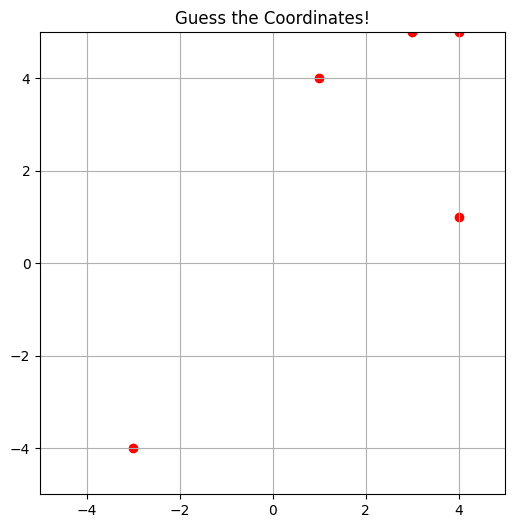


Now enter your guesses for each red point:
Point 1: Enter coordinates as x,y → -3, -4
Incorrect. Actual: (4, 1)
Point 2: Enter coordinates as x,y → 4, 5
Incorrect. Actual: (1, 4)
Point 3: Enter coordinates as x,y → 4, 5
Incorrect. Actual: (3, 5)
Point 4: Enter coordinates as x,y → 4, 5
Correct!
Point 5: Enter coordinates as x,y → -3, 4
Incorrect. Actual: (-3, -4)

Final Score: 1/5


In [5]:
scatter_plot_game()

In [6]:
algebra_game()

Solve: -1x = -8
x = 8
Correct!
Solve: 4x + 2 = -10
x = -3
Correct!
Solve: -10x + 6 = 86
x = -8
Correct!
Solve: -3x + 8 = 26
x = -6
Correct!
Solve: 8x = 0
x = 0
Correct!
Final Score: 5/5


In [7]:
projectile_game_level1()

Wall at x = 11, height = 13


interactive(children=(FloatSlider(value=-1.0, description='a', max=0.0, min=-1.0), FloatSlider(value=5.0, desc…

Wall at x = 10, height = 16
Enter a: -0.2
Enter b: 6
Enter c: 5


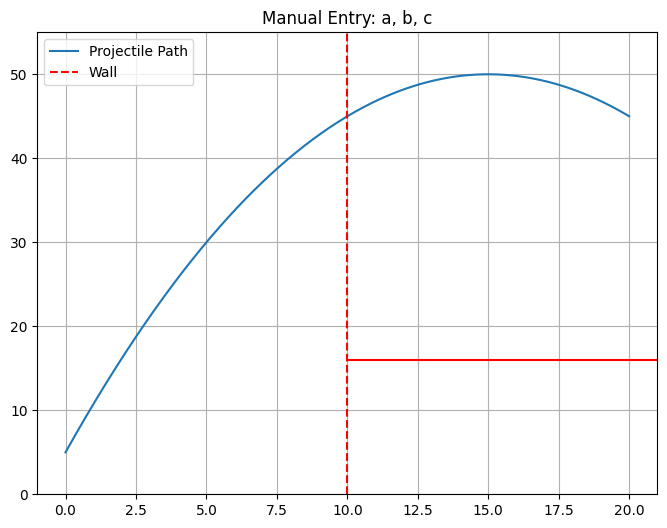

Success! You cleared the wall.


In [8]:
projectile_game_level2()

In [ ]:
# Run in Colab to capture widget presence and inject valid "state" into notebook JSON
import json
from google.colab import files
from pathlib import Path
from IPython.display import Javascript, display
import time

# Best-effort frontend capture: tries to trigger a browser-side download containing simple widget IDs
js = """
(async () => {
  await new Promise(r => setTimeout(r, 200));
  try {
    const widgets = {};
    document.querySelectorAll('[data-widget-model-id]').forEach(el => {
      const id = el.getAttribute('data-widget-model-id');
      if (id && !widgets[id]) widgets[id] = {id};
    });
    const blob = new Blob([JSON.stringify({ok:true,payload:widgets})], {type:'application/json'});
    const a = document.createElement('a');
    a.href = URL.createObjectURL(blob);
    a.download = 'colab_widget_state_capture.json';
    a.click();
  } catch(e) {
    const blob = new Blob([JSON.stringify({ok:false,error:String(e)})], {type:'application/json'});
    const a = document.createElement('a');
    a.href = URL.createObjectURL(blob);
    a.download = 'colab_widget_state_capture.json';
    a.click();
  }
})();
"""
display(Javascript(js))
print("If the browser auto-downloads colab_widget_state_capture.json, save it and upload it when prompted below.")
print("If not, continue; the cell will still insert empty state objects to satisfy validation.\n")

# Upload the capture file if the browser saved it (optional)
print("Upload the capture file now (or cancel if none):")
capture_uploaded = files.upload()  # no args in Colab
capture = None
if capture_uploaded:
    cap_name = list(capture_uploaded.keys())[0]
    try:
        capture = json.loads(capture_uploaded[cap_name].decode('utf-8'))
        print("Capture loaded:", cap_name)
    except Exception as e:
        print("Failed to parse capture file:", e)
        capture = None
else:
    print("No capture file uploaded; proceeding with conservative repair.")

# Upload the notebook you want repaired (download from File -> Download .ipynb first if needed)
print("\nUpload the .ipynb to repair (download from File -> Download .ipynb if you want the current working copy):")
nb_upload = files.upload()
for fname in nb_upload.keys():
    nb = json.loads(nb_upload[fname].decode('utf-8'))
    repaired = False

    # If top-level metadata.widgets exists and is dict, inject captured state or empty dict
    top_widgets = nb.get('metadata', {}).get('widgets')
    if isinstance(top_widgets, dict) and 'state' not in top_widgets:
        top_widgets['state'] = capture.get('payload') if (capture and capture.get('ok') and capture.get('payload')) else {}
        nb['metadata']['widgets'] = top_widgets
        repaired = True

    # Walk and fix any metadata.widgets dicts in the notebook
    def walk_and_fix(obj):
        nonlocal repaired
        if isinstance(obj, dict):
            for k in list(obj.keys()):
                if k == 'widgets':
                    v = obj[k]
                    if isinstance(v, dict) and 'state' not in v:
                        v['state'] = capture.get('payload') if (capture and capture.get('ok') and capture.get('payload')) else {}
                        obj[k] = v
                        repaired = True
                    elif not isinstance(v, dict):
                        obj[k] = {'state': capture.get('payload') if (capture and capture.get('ok') and capture.get('payload')) else {}}
                        repaired = True
                else:
                    walk_and_fix(obj[k])
        elif isinstance(obj, list):
            for item in obj:
                walk_and_fix(item)

    walk_and_fix(nb.get('cells', []))
    out_name = fname.replace('.ipynb', '_colab_preserved_state.ipynb')
    Path(out_name).write_text(json.dumps(nb, ensure_ascii=False, indent=1), encoding='utf-8')
    print(f"Wrote repaired notebook: {out_name}  (widgets state inserted: {repaired})")
    files.download(out_name)


<IPython.core.display.Javascript object>

If the browser auto-downloads colab_widget_state_capture.json, save it and upload it when prompted below.
If not, continue; the cell will still insert empty state objects to satisfy validation.

Upload the capture file now (or cancel if none):


Saving colab_widget_state_capture.json to colab_widget_state_capture.json
Capture loaded: colab_widget_state_capture.json

Upload the .ipynb to repair (download from File -> Download .ipynb if you want the current working copy):
